In [11]:
#importações
import matplotlib.pyplot as plt
import requests
import pandas as pd
import os
from dotenv import load_dotenv
from textblob import TextBlob
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [64]:
load_dotenv() 

url = ('https://newsapi.org/v2/everything?'
       'q=bitcoin&'
       'language=en&'
       'sortBy=publishedAt&'
       f'apiKey={os.getenv('NEWSAPIKEY')}')

response = requests.get(url)
data = response.json()

# Extraindo título e descrição
articles = data['articles']
news_df = pd.DataFrame([{
    'title': article['title'],
    'description': article['description']
} for article in articles])

news_df.head(30)

,title,description
0,Is Hong Kong’s New World Too Big to Fail?,
1,Grain Market Bulls Look to Extend Friday’s Ral...,
2,Guatemala seeks 700 megawatts of gas for power...,
3,"BTC Becomes the New Favorite of Capital, Sunny...",As a global leader in intelligent cloud mining...
4,Trump expected to sign proclamation finalizing...,
5,$1 Billion More Bitcoin for Strategy? Of Cours...,The public company made its largest Bitcoin bu...
6,"Strategy Shrugs Off Israel-Iran Tensions, Adds...","Since Strategy added a Bitcoin treasury, other..."
7,Sugar Prices Rebound on Strength in the Brazil...,
8,"CoverGirl parent Coty exploring sale, WWD reports",
9,Coffee Prices Retreat on Favorable Growing Con...,


In [66]:
#Verificando o formado do dataframe
news_df.shape

(100, 2)

In [68]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        100 non-null    object
 1   description  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [70]:

def get_sentiment(text):
    if text:
        blob = TextBlob(text)
        return blob.sentiment.polarity
    return 0

# Calcula sentimento com base na descrição
news_df['sentiment'] = news_df['description'].apply(get_sentiment)

print(news_df[['title', 'sentiment']].head())


                                               title  sentiment
0          Is Hong Kong’s New World Too Big to Fail?       0.00
1  Grain Market Bulls Look to Extend Friday’s Ral...       0.00
2  Guatemala seeks 700 megawatts of gas for power...       0.00
3  BTC Becomes the New Favorite of Capital, Sunny...       0.35
4  Trump expected to sign proclamation finalizing...       0.00


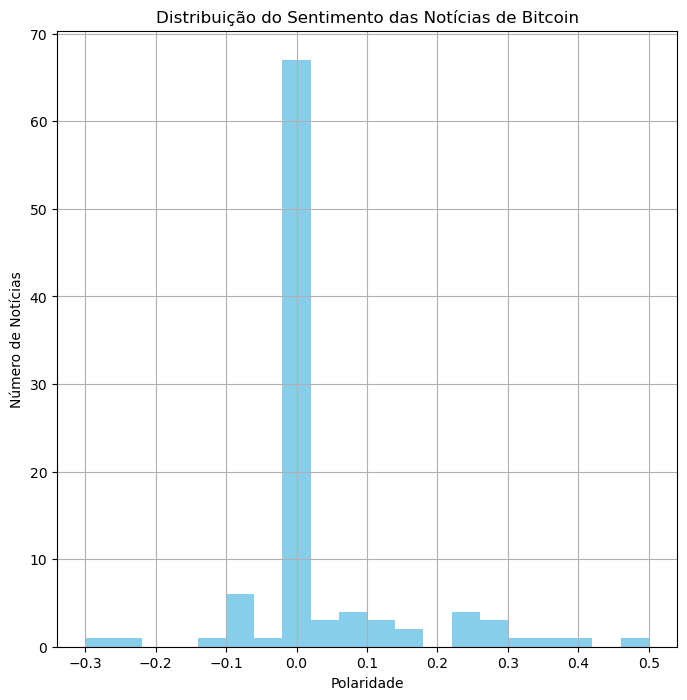

In [72]:
plt.figure(
    figsize=(8,8)
)
plt.hist(news_df['sentiment'], bins=20, color='skyblue')
plt.title('Distribuição do Sentimento das Notícias de Bitcoin')
plt.xlabel('Polaridade')
plt.ylabel('Número de Notícias')
plt.grid(True)
plt.show()

C:\Users\FilipeQueirozdeAbreu\AppData\Local\Temp\ipykernel_19460\2192983441.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


<Axes: xlabel='sentiment', ylabel='Density'>

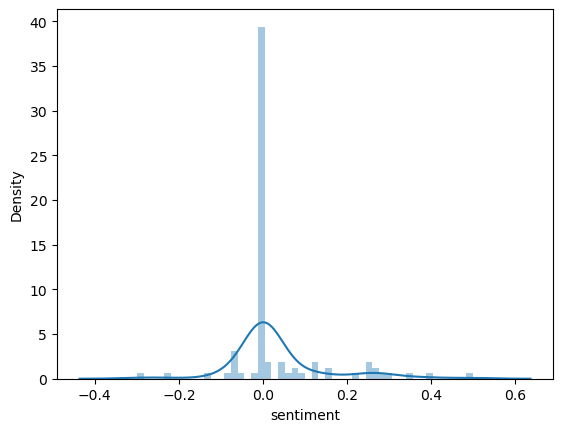

In [11]:
import seaborn as sns

sns.distplot(
    news_df['sentiment']
)

## Noticias em português

In [74]:
load_dotenv() 

url = ('https://newsapi.org/v2/everything?'
       'q=bitcoin&'
       'language=pt&'
       'sortBy=publishedAt&'
       f'apiKey={os.getenv("NEWSAPIKEY")}')

response = requests.get(url)
data = response.json()


articles = data['articles']
news_df = pd.DataFrame([{
    'title': article['title'],
    'description': article['description'],
    'publishedAt': article['publishedAt']  # Adicionado campo de data
} for article in articles])

news_df.head(5)


,title,description,publishedAt
0,Minerar bitcoin já não é rentável,Aumento na dificuldade do processo matemático ...,2025-06-16T15:00:01Z
1,Bitcoin sobe e tenta recuperação depois de que...,Criptomoedas deixam geopolítica de lado e come...,2025-06-16T13:46:33Z
2,"Veja análise do Ibov, S&P 500, Nasdaq, dólar e...","Decisão da Selic, juros nos EUA e dados econôm...",2025-06-16T10:51:45Z
3,Day Trade hoje: o que esperar dos minicontrato...,Confira os pontos de suporte e resistência do ...,2025-06-16T10:25:30Z
4,Dow Jones Futuro se recupera mesmo com escalad...,"Ataques continuaram ao longo do fim de semana,...",2025-06-16T08:36:21Z


In [80]:
news_df.info()

#O campo data nao veio já no formato data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        82 non-null     object
 1   description  83 non-null     object
 2   publishedAt  83 non-null     object
dtypes: object(3)
memory usage: 2.1+ KB


In [103]:
#Esse codigo divide o texto de cada célula em duas partes
#Uma parte antes do T e outra apos o T
#Logo apos em seleciono apenas a parte que vem antes do T, assim eu prodronizo a data para algo mais amigavel
news_df['publishedAt'] =  news_df['publishedAt'].apply(
        lambda x: x.split('T')[0]
    )

news_df['publishedAt']

0     2025-06-16
1     2025-06-16
2     2025-06-16
3     2025-06-16
4     2025-06-16
         ...    
78    2025-06-05
79    2025-06-05
80    2025-06-05
81    2025-06-05
82    2025-06-04
Name: publishedAt, Length: 83, dtype: object

In [109]:
#Aqui eu converto o tipo do campo para dateime
news_df['publishedAt'] = pd.to_datetime(news_df['publishedAt'])
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   title        82 non-null     object        
 1   description  83 non-null     object        
 2   publishedAt  83 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 2.1+ KB


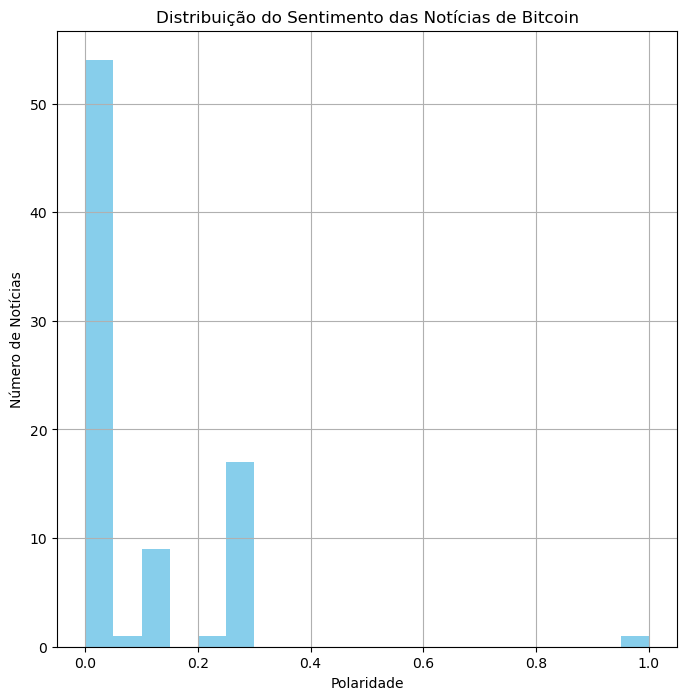

In [111]:
#utilizo a função que foi criada anteriormente para calcular a polaridade das noticias
news_df['sentiment'] = news_df['description'].apply(get_sentiment)

#ploto o grafico novamente
plt.figure(
    figsize=(8,8)
)
plt.hist(news_df['sentiment'], bins=20, color='skyblue')
plt.title('Distribuição do Sentimento das Notícias de Bitcoin')
plt.xlabel('Polaridade')
plt.ylabel('Número de Notícias')
plt.grid(True)
plt.show()


Aqui é intesssante notar como as noticas em portugues para ser mais otimistas do que as notificas em ingles
Isso me deu a idea de colocar o gráfico de cada um lado a lado para poder ver essa comparação melhor

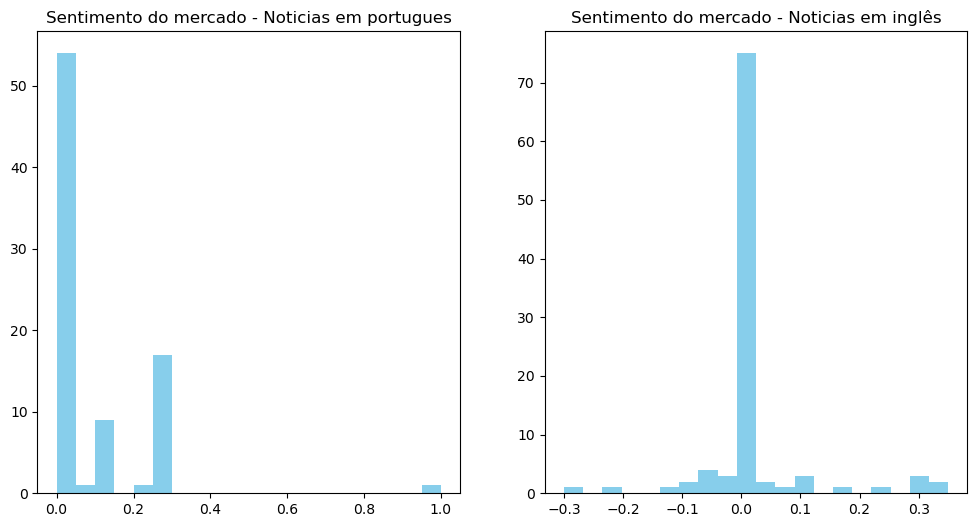

In [138]:

#ingles
url_en = ('https://newsapi.org/v2/everything?'
       'q=bitcoin&'
       'language=en&'
       'sortBy=publishedAt&'
       f'apiKey={os.getenv('NEWSAPIKEY')}')

#portugues
url_pt = ('https://newsapi.org/v2/everything?'
       'q=bitcoin&'
       'language=pt&'
       'sortBy=publishedAt&'
       f'apiKey={os.getenv('NEWSAPIKEY')}')

response_en = requests.get(url_en)
response_pt = requests.get(url_pt)
data_en = response_en.json()
data_pt = response_pt.json()


articles_en = data_en['articles']
news_df_en = pd.DataFrame([{
    'title': article['title'],
    'description': article['description']
} for article in articles_en])

articles_pt = data_pt['articles']
news_df_pt = pd.DataFrame([{
    'title': article['title'],
    'description': article['description']
} for article in articles_pt])


news_df_en['sentiment'] = news_df_en['description'].apply(get_sentiment)
news_df_pt['sentiment'] = news_df_pt['description'].apply(get_sentiment)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 linha, 2 colunas

# Primeiro gráfico
axs[0].hist(news_df_pt['sentiment'], bins=20, color='skyblue')
axs[0].set_title('Sentimento do mercado - Noticias em portugues')

# Segundo gráfico
axs[1].hist(news_df_en['sentiment'], bins=20, color='skyblue')
axs[1].set_title('Sentimento do mercado - Noticias em inglês')



plt.show()

In [142]:
articles_pt

[{'source': {'id': None, 'name': 'Abril.com.br'},
  'author': 'Bruno Garattoni',
  'title': 'Minerar bitcoin já não é rentável',
  'description': 'Aumento na dificuldade do processo matemático já inviabilizou a prática. Entenda por que.',
  'url': 'https://super.abril.com.br/tecnologia/minerar-bitcoin-ja-nao-e-rentavel/',
  'urlToImage': 'https://super.abril.com.br/wp-content/uploads/2025/06/SI_476_Novas_Bitcoin.jpg?quality=70&strip=info&resize=1080,565&crop=1',
  'publishedAt': '2025-06-16T15:00:01Z',
  'content': 'Relâmpago: Revista em Casa por R$ 9,90\xa0(Midjourney/Superinteressante)\r\nContinua após publicidade\r\nPara minerar bitcoin, você coloca o seu computador para resolver uma série de cálculos; ao obter a re… [+769 chars]'},
 {'source': {'id': 'globo', 'name': 'Globo'},
  'author': None,
  'title': 'Bitcoin sobe e tenta recuperação depois de queda disparada pelo conflito Israel-Irã',
  'description': 'Criptomoedas deixam geopolítica de lado e começam a semana com desempenhos

In [7]:
load_dotenv() 

url = ('https://newsapi.org/v2/everything?'
       'q=bitcoin&'
       'language=pt&'
       'sortBy=publishedAt&'
       f'apiKey={os.getenv('NEWSAPIKEY')}')

response = requests.get(url)
data = response.json()

# Extraindo título e descrição
articles = data['articles']
news_df = pd.DataFrame([{
    'title': article['title'],
    'description': article['description']
} for article in articles])

news_df.head(30)

,title,description
0,Bitcoin e demais criptomoedas caem em dia de c...,Moedas digitais recuam depois de forte valoriz...
1,Day Trade hoje: o que esperar dos minicontrato...,Confira os pontos de suporte e resistência do ...
2,Dow Jones Futuro sobe após acordo EUA-Japão e ...,Resultados sólidos podem sustentar as elevadas...
3,Bitget expande a iniciativa de PayFi Islands c...,"DUMAGUETE, Filipinas, July 23, 2025 (GLOBE NEW..."
4,Crise na habitação: a culpa é do Keynesianismo,O ciclo é vicioso e sem incentivo real para mu...
5,A competência estadual para legislar sobre ati...,"A Constituição de 1988, ao estruturar a organi..."
6,O Pix do Brasil já conseguiu o que as criptomo...,Paul Krugman sugere que o Brasil pode ter cria...
7,Consultoria cria serviço de aconselhamento cri...,Serviço é voltado exclusivamente a clientes co...
8,Strategy já é dona de 3% de todos os bitcoins ...,Empresa comprou mais 6.220 BTCs durante um per...
9,"Bitcoin volta a subir e chega aos US$ 119 mil,...",Criptomoedas seguem em alta com noticiário reg...


In [9]:
for i in news_df['title'].head(30):
    print(i)

Bitcoin e demais criptomoedas caem em dia de correção
Day Trade hoje: o que esperar dos minicontratos e do Ibovespa nesta quarta (23)
Dow Jones Futuro sobe após acordo EUA-Japão e antes dos balanços de Alphabet e Tesla
Bitget expande a iniciativa de PayFi Islands com tecnologia Starlink para Negros Oriental
Crise na habitação: a culpa é do Keynesianismo
A competência estadual para legislar sobre ativos virtuais
O Pix do Brasil já conseguiu o que as criptomoedas estão tentando, diz Nobel de economia
Consultoria cria serviço de aconselhamento cripto para alta renda
Strategy já é dona de 3% de todos os bitcoins do mundo
Bitcoin volta a subir e chega aos US$ 119 mil, enquanto ether corrige
InfoMorning: Valorização das empresas que têm Bitcoin; fim de FIIs menores? e mais
Day Trade hoje: o que esperar dos minicontratos e do Ibovespa nesta terça (22)
Futuros dos EUA operam mistos após novos recordes e à espera de discurso de Powell
Empresas com Bitcoin no caixa sobem 5 vezes mais que o Nasda

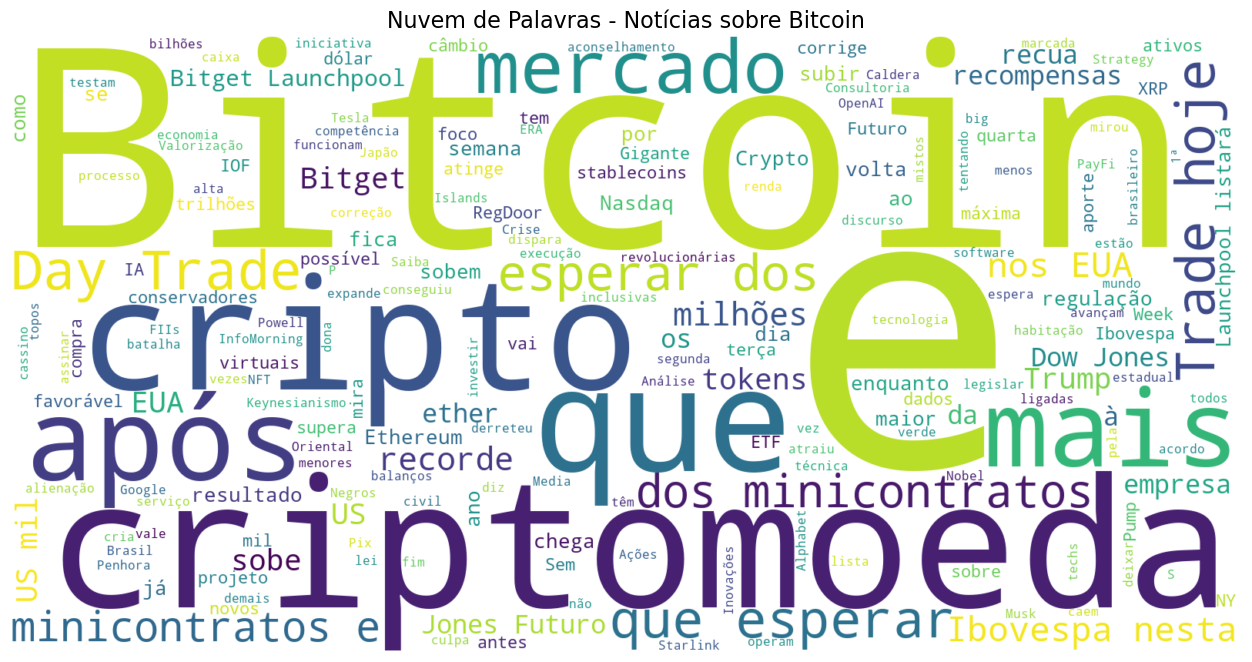

In [55]:
text = ' '.join(news_df['title'].fillna(''))



stopwords = set(STOPWORDS)
stopwords.update(['de', 'a', 'o', 'em', 'para', 'com', 'é', 'do', 'na'])

# Criar nuvem de palavras
wordcloud = WordCloud(stopwords=stopwords, width=1600, height=800, background_color='white', colormap='viridis').generate(text)

# Exibir a nuvem
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras - Notícias sobre Bitcoin', fontsize=16)
plt.show()